#CAR SALE DATA IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import norm
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn import preprocessing
# from sklearn.model_selection import KFold
import statistics as st
import pandas as pd
import math
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
Data = pd.read_csv('/content/Car_Sale_Data.csv', sep=',', encoding='latin-1')

In [ ]:
AllOGData = pd.read_csv('/content/Car_Sale_Data.csv', sep=',', encoding='latin-1')

In [ ]:
px.histogram(
    AllOGData , x = ['Fuel_Type','Seller_Type','Transmission']
    , text_auto = '.2f' , template = 'plotly_dark'
    , title = 'Car Info'
)

In [ ]:
px.histogram(
    AllOGData , x = ['Owner']
    , text_auto = '.2f' , template = 'plotly_dark'
    , title = 'Car Info'
)

In [ ]:
AllOGData

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.025214,0.028828,0.039472,0.044289,0.043469,0.057396,0.056423,...,0.440689,0.462026,0.484889,0.466592,0.465881,0.557917,0.452553,0.500635,0.502693,0.530026
1,CO2,AFG,Afghanistan,1.733920,1.733710,1.693584,1.733905,2.190318,2.028967,1.892642,...,7.825741,8.346521,7.527594,8.066138,7.932005,7.249069,7.054133,7.930781,8.259915,8.707350
2,CO2,AGO,Angola,8.933899,8.519513,10.366104,11.346996,11.806561,10.904653,7.291981,...,30.887264,33.097499,31.285803,27.942099,26.258887,27.573216,20.710918,25.262832,27.353038,28.229928
3,CO2,AIA,Anguilla,0.002178,0.002178,0.002273,0.002118,0.002360,0.002594,0.002444,...,0.027917,0.028027,0.028363,0.029087,0.028247,0.027604,0.022804,0.022018,0.021861,0.022956
4,CO2,AIR,International Aviation,169.900399,169.900399,179.759531,187.494406,180.478129,174.582471,174.907983,...,507.505761,536.213680,560.173839,589.919315,615.937542,625.141435,298.655678,331.317425,411.474866,491.632308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,CO2,ZWE,Zimbabwe,9.529530,9.476805,9.090940,10.551537,10.400689,9.167706,10.047798,...,12.597723,12.689493,11.266275,10.585434,12.270039,11.169150,9.072133,10.623290,10.963004,11.744051
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,CO2,EU27,EU27,3516.043820,3527.064466,3673.209130,3865.983444,3806.132347,3715.356555,3975.200616,...,3025.896239,3086.214921,3094.776695,3118.707522,3049.511170,2908.156852,2641.187916,2833.755059,2756.906302,2512.067780
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
AllData = AllOGData.drop(columns={'Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'},axis=1)

###Show Data

In [ ]:
AllData

,Age,Selling_Price,Present_Price,Kms_Driven
0,5,3.35,5.59,27000
1,6,4.75,9.54,43000
2,2,7.25,9.85,6900
3,8,2.85,4.15,5200
4,5,4.60,6.87,42450
...,...,...,...,...
296,3,9.50,11.60,33988
297,4,4.00,5.90,60000
298,10,3.35,11.00,87934
299,2,11.50,12.50,9000


In [ ]:
Data

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.025214,0.028828,0.039472,0.044289,0.043469,0.057396,0.056423,...,0.440689,0.462026,0.484889,0.466592,0.465881,0.557917,0.452553,0.500635,0.502693,0.530026
1,CO2,AFG,Afghanistan,1.733920,1.733710,1.693584,1.733905,2.190318,2.028967,1.892642,...,7.825741,8.346521,7.527594,8.066138,7.932005,7.249069,7.054133,7.930781,8.259915,8.707350
2,CO2,AGO,Angola,8.933899,8.519513,10.366104,11.346996,11.806561,10.904653,7.291981,...,30.887264,33.097499,31.285803,27.942099,26.258887,27.573216,20.710918,25.262832,27.353038,28.229928
3,CO2,AIA,Anguilla,0.002178,0.002178,0.002273,0.002118,0.002360,0.002594,0.002444,...,0.027917,0.028027,0.028363,0.029087,0.028247,0.027604,0.022804,0.022018,0.021861,0.022956
4,CO2,AIR,International Aviation,169.900399,169.900399,179.759531,187.494406,180.478129,174.582471,174.907983,...,507.505761,536.213680,560.173839,589.919315,615.937542,625.141435,298.655678,331.317425,411.474866,491.632308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,CO2,ZWE,Zimbabwe,9.529530,9.476805,9.090940,10.551537,10.400689,9.167706,10.047798,...,12.597723,12.689493,11.266275,10.585434,12.270039,11.169150,9.072133,10.623290,10.963004,11.744051
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,CO2,EU27,EU27,3516.043820,3527.064466,3673.209130,3865.983444,3806.132347,3715.356555,3975.200616,...,3025.896239,3086.214921,3094.776695,3118.707522,3049.511170,2908.156852,2641.187916,2833.755059,2756.906302,2512.067780
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###AllData Correlation Matrix

In [ ]:
AllData.corr()

,Age,Selling_Price,Present_Price,Kms_Driven
Age,1.000000,-0.236141,0.047584,0.524342
Selling_Price,-0.236141,1.000000,0.878983,0.029187
Present_Price,0.047584,0.878983,1.000000,0.203647
Kms_Driven,0.524342,0.029187,0.203647,1.000000


#Descriptive statistics


In [ ]:
#Mean, Median, Mode
print("Sample Mean = ", Data['Kms_Driven'].mean())
print("Sample Median = ", Data['Kms_Driven'].median())
print('The mode is', st.mode(Data['Kms_Driven']))

#Variance & Standard Deviation
Var_sample = round(np.var(Data['Kms_Driven'], ddof = 1))
print('Sample variance =', Var_sample, 'km^2.')
Sd_sample = round(np.sqrt(np.var(Data['Kms_Driven'], ddof = 1)))
print('Sample standard deviation =', Sd_sample, 'vkm.')

Sample Mean =  36947.20598006644
Sample Median =  32000.0
The mode is 15000
Sample variance = 1512189738 km^2.
Sample standard deviation = 38887 vkm.


#Check Outlier & Normality

1. Check outliers

          Kms_Driven
count     301.000000
mean    36947.205980
std     38886.883882
min       500.000000
25%     15000.000000
50%     32000.000000
75%     48767.000000
max    500000.000000
Q1:  15000.0
Q3:  48767.0
IQR:  33767.0
Lower bound:  -35650.5
Upper bound:  99417.5
Outliers for data larger than upper bound:
     Kms_Driven
37       127000
50       104707
53       135000
77       135154
84       197176
85       142000
179      213000
196      500000
Outliers data smaller than lower bound:
No outliers


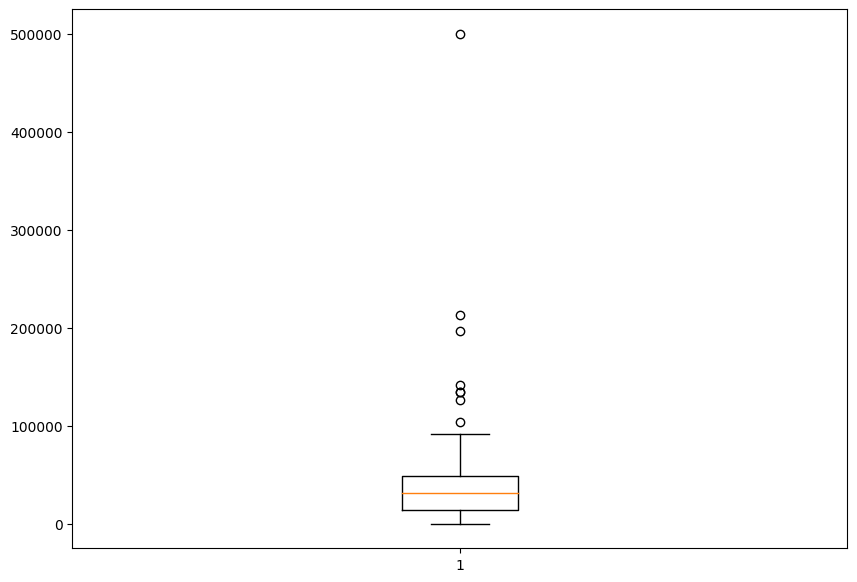

<Axes: xlabel='Kms_Driven'>

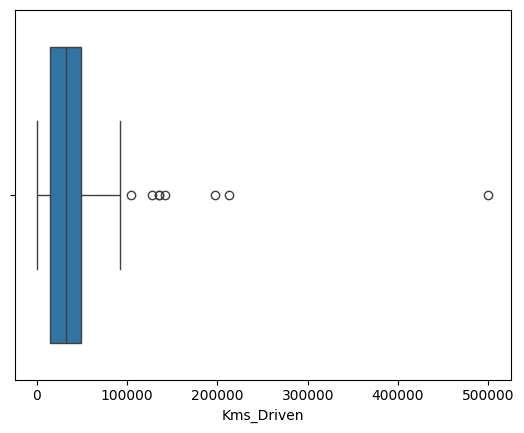

In [ ]:
Q1 = Data['Kms_Driven'].quantile(0.25)
Q3 = Data['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = pd.DataFrame(Data)
print(df.describe())

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

outliers = Data[Data['Kms_Driven'] > upper_bound ]
print("Outliers for data larger than upper bound:")
if outliers.empty:
  print("No outliers")
else:
  print(outliers)

outlier = Data[Data['Kms_Driven'] < lower_bound ]
print("Outliers data smaller than lower bound:")
if outlier.empty:
  print("No outliers")
else:
  print(outlier)
#Drawing boxplots
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Kms_Driven'])
plt.show()

# sns.boxplot (x= df['Kms_Driven'] ,data=df["Kms_Driven"])
sns.boxplot(x='Kms_Driven', data=df)


##2. Check normality

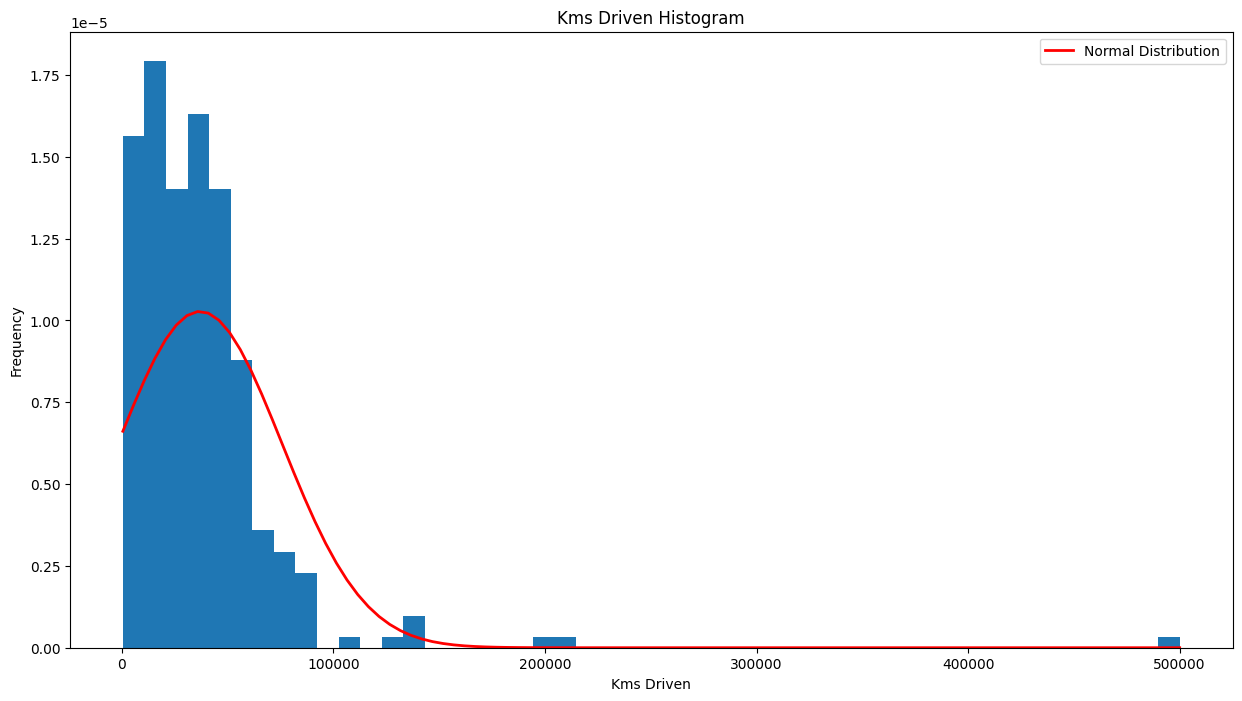

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Calculate the histogram bins
bins = np.linspace(500, 500000, 50)  # 50 bins from 500 to 500000

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the histogram
_, _, patches = ax.hist(Data['Kms_Driven'], bins=bins, density=True)
plt.xlabel("Kms Driven")
plt.ylabel("Frequency")
plt.title("Kms Driven Histogram")

# Plot the normal distribution
mu, std = norm.fit(Data['Kms_Driven'])
x = np.linspace(Data['Kms_Driven'].min(), Data['Kms_Driven'].max(), 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')
plt.legend()

plt.show()

##Age Graph + Outlier

          Kms_Driven
count     301.000000
mean    36947.205980
std     38886.883882
min       500.000000
25%     15000.000000
50%     32000.000000
75%     48767.000000
max    500000.000000
Q1:  3.0
Q3:  7.0
IQR:  4.0
Lower bound:  -3.0
Upper bound:  13.0
Outliers for data larger than upper bound:
     Age  Selling_Price  Present_Price  Kms_Driven
37    16           0.35           2.28      127000
39    16           2.25           7.98       62000
54    14           2.75          10.21       90000
77    15           1.50          12.35      135154
84    14           3.49          13.46      197176
92    14           3.51          13.70       75000
189   14           0.20           0.57       55000
Outliers data smaller than lower bound:
No outliers


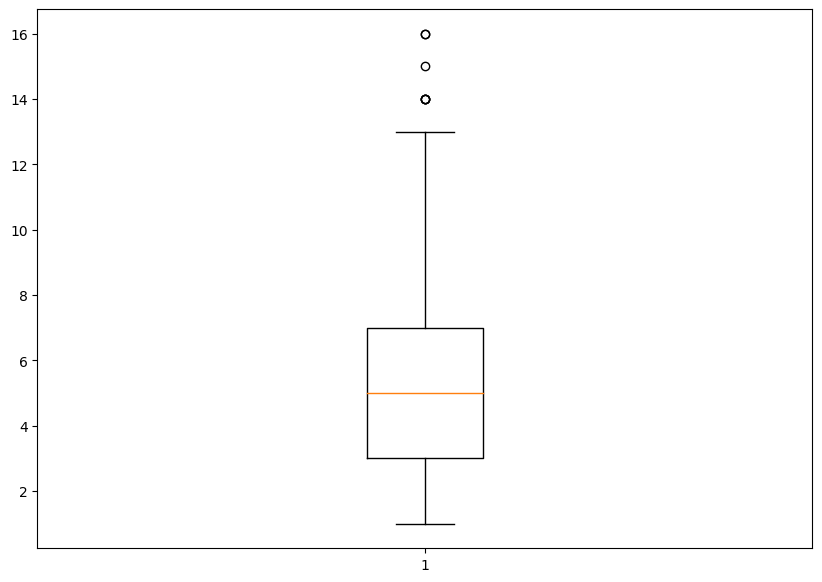

<Axes: xlabel='Age'>

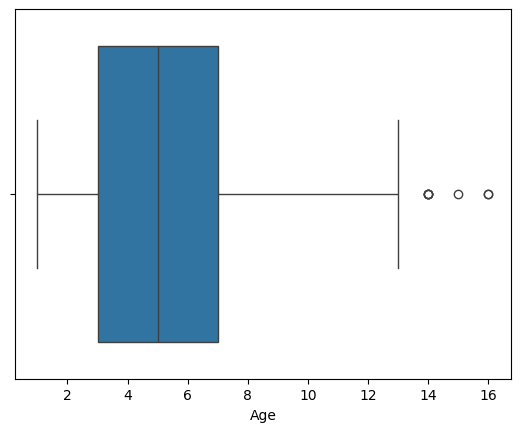

In [ ]:
Q1 = AllData['Age'].quantile(0.25)
Q3 = AllData['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = pd.DataFrame(Data)
print(df.describe())

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

ageoutliers = AllData[AllData['Age'] > upper_bound ]
print("Outliers for data larger than upper bound:")
if ageoutliers.empty:
  print("No outliers")
else:
  print(ageoutliers)

ageoutlier = AllData[AllData['Age'] < lower_bound ]
print("Outliers data smaller than lower bound:")
if ageoutlier.empty:
  print("No outliers")
else:
  print(ageoutlier)
#Drawing boxplots
fig = plt.figure(figsize =(10, 7))
plt.boxplot(AllData['Age'])
plt.show()

# sns.boxplot (x= df['Kms_Driven'] ,data=df["Kms_Driven"])
sns.boxplot(x='Age', data=AllData)

##Selling Price Graph + Outliers

          Kms_Driven
count     301.000000
mean    36947.205980
std     38886.883882
min       500.000000
25%     15000.000000
50%     32000.000000
75%     48767.000000
max    500000.000000
Q1:  0.9
Q3:  6.0
IQR:  5.1
Lower bound:  -6.749999999999999
Upper bound:  13.649999999999999
Outliers for data larger than upper bound:
    Age  Selling_Price  Present_Price  Kms_Driven
50    7          14.90          30.61      104707
51    4          23.00          30.61       40000
52    2          18.00          19.77       15000
53    6          16.00          30.61      135000
59    5          19.99          35.96       41000
62    5          18.75          35.96       78000
63    4          23.50          35.96       47000
64    2          33.00          36.23        6000
66    2          19.75          23.15       11000
69    3          14.25          20.91       12000
79    7          14.50          30.61       89000
80    3          14.73          14.89       23000
82    2          23.00  

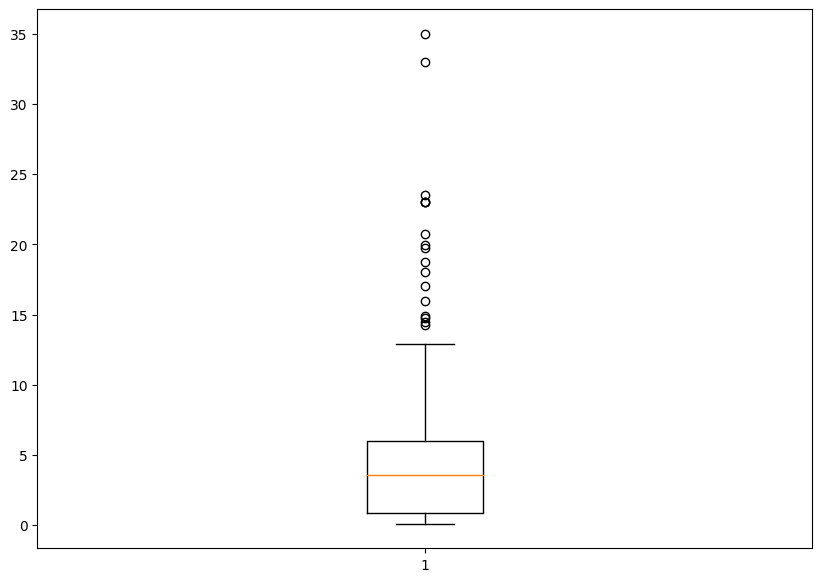

<Axes: xlabel='Selling_Price'>

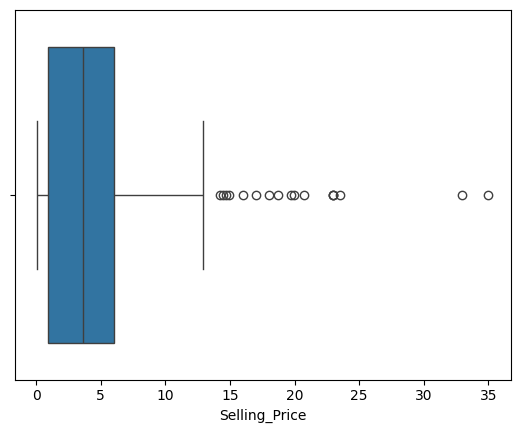

In [ ]:
Q1 = AllData['Selling_Price'].quantile(0.25)
Q3 = AllData['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = pd.DataFrame(Data)
print(df.describe())

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

selloutliers = AllData[AllData['Selling_Price'] > upper_bound ]
print("Outliers for data larger than upper bound:")
if selloutliers.empty:
  print("No outliers")
else:
  print(selloutliers)

selloutlier = AllData[AllData['Selling_Price'] < lower_bound ]
print("Outliers data smaller than lower bound:")
if selloutlier.empty:
  print("No outliers")
else:
  print(selloutlier)
#Drawing boxplots
fig = plt.figure(figsize =(10, 7))
plt.boxplot(AllData['Selling_Price'])
plt.show()

# sns.boxplot (x= df['Kms_Driven'] ,data=df["Kms_Driven"])
sns.boxplot(x='Selling_Price', data=AllData)

##Present Price Graph + Outliers

          Kms_Driven
count     301.000000
mean    36947.205980
std     38886.883882
min       500.000000
25%     15000.000000
50%     32000.000000
75%     48767.000000
max    500000.000000
Q1:  1.2
Q3:  9.9
IQR:  8.700000000000001
Lower bound:  -11.850000000000001
Upper bound:  22.950000000000003
Outliers for data larger than upper bound:
    Age  Selling_Price  Present_Price  Kms_Driven
50    7          14.90          30.61      104707
51    4          23.00          30.61       40000
53    6          16.00          30.61      135000
59    5          19.99          35.96       41000
62    5          18.75          35.96       78000
63    4          23.50          35.96       47000
64    2          33.00          36.23        6000
66    2          19.75          23.15       11000
79    7          14.50          30.61       89000
82    2          23.00          25.39       15000
85   13           2.50          23.73      142000
86    9          35.00          92.60       78000
93    4  

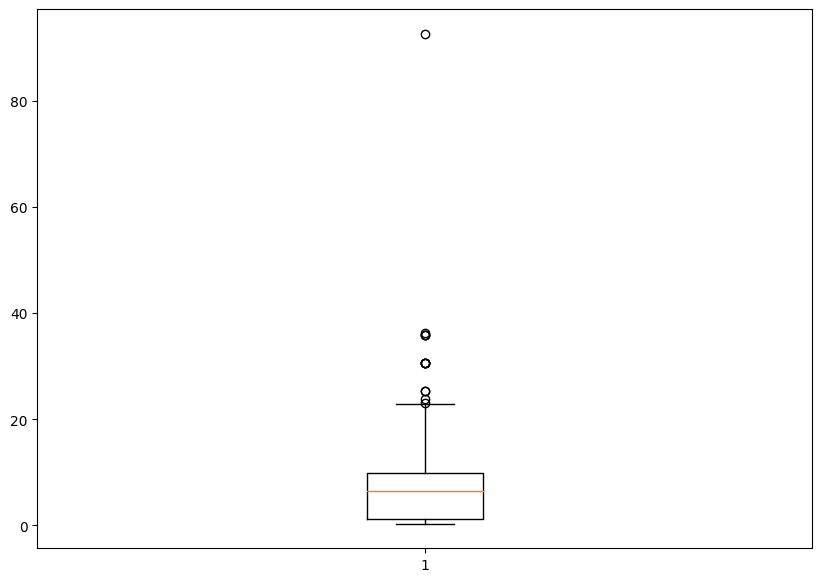

<Axes: xlabel='Present_Price'>

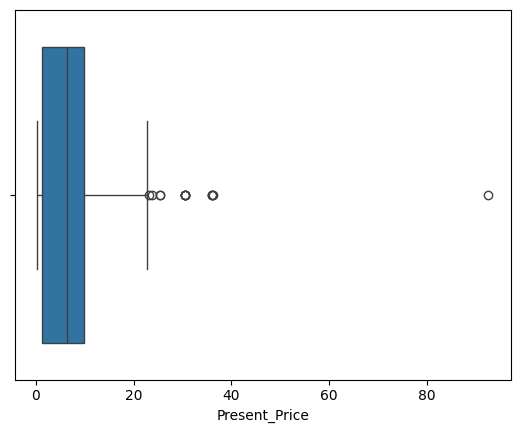

In [ ]:
Q1 = AllData['Present_Price'].quantile(0.25)
Q3 = AllData['Present_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = pd.DataFrame(Data)
print(df.describe())

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

presoutliers = AllData[AllData['Present_Price'] > upper_bound ]
print("Outliers for data larger than upper bound:")
if presoutliers.empty:
  print("No outliers")
else:
  print(presoutliers)

presoutlier = AllData[AllData['Present_Price'] < lower_bound ]
print("Outliers data smaller than lower bound:")
if presoutlier.empty:
  print("No outliers")
else:
  print(presoutlier)
#Drawing boxplots
fig = plt.figure(figsize =(10, 7))
plt.boxplot(AllData['Present_Price'])
plt.show()

# sns.boxplot (x= df['Kms_Driven'] ,data=df["Kms_Driven"])
sns.boxplot(x='Present_Price', data=AllData)

##Removing Outliers

In [ ]:
# NoneOutlier = AllData[~AllData.isin(dataoutliers)].dropna()
# NoneOutlier = NoneOutlier[~NoneOutlier.isin(outliers)].dropna()
# NoneOutlier

#R2 score dropped to 0.745
NoAgeOut = AllData[~AllData.isin(ageoutliers)].dropna()
#R2 score dropped to 0.781
NoSellOut = AllData[~AllData.isin(selloutliers)].dropna()
#R2 Score dropped to 0.775
NoPresOutlier = AllData[~AllData.isin(presoutliers)].dropna()


#NoAgeKmOut (A combination of Age+KmsDriven) is 0.8335
NoAgeKmOut = NoAgeOut[~NoAgeOut.isin(outliers)].dropna()
#Selling+Km produces R score of 0.87
NoSellKmOut = NoSellOut[~NoSellOut.isin(outliers)].dropna()
#Present Prices + Km Driven produces R score of 8.34
NoPresKmOutlier = NoPresOutlier[~NoPresOutlier.isin(outliers)].dropna()

NoAllOutlier = NoPresKmOutlier[~NoPresKmOutlier.isin(selloutliers)].dropna()

In [ ]:
NoSellKmOut

,Age,Selling_Price,Present_Price,Kms_Driven
0,5.0,3.35,5.59,27000.0
1,6.0,4.75,9.54,43000.0
2,2.0,7.25,9.85,6900.0
3,8.0,2.85,4.15,5200.0
4,5.0,4.60,6.87,42450.0
...,...,...,...,...
296,3.0,9.50,11.60,33988.0
297,4.0,4.00,5.90,60000.0
298,10.0,3.35,11.00,87934.0
299,2.0,11.50,12.50,9000.0


In [ ]:
for column in NoSellKmOut.columns:
  boxcox, lambdad = stats.boxcox(NoSellKmOut[column])
  pd.DataFrame(boxcox)
  NoSellKmOut[column] = boxcox

NoSellKmOut

,Age,Selling_Price,Present_Price,Kms_Driven
0,1.629501,1.496421,2.290535,466.048006
1,1.816649,2.056587,3.297213,600.461246
2,0.696851,2.830643,3.363033,221.318500
3,2.113014,1.258865,1.799448,189.563904
4,1.629501,2.002281,2.658737,596.268459
...,...,...,...,...
296,1.107936,3.387239,3.710289,528.294535
297,1.401162,1.772563,2.384600,719.808330
298,2.343797,1.496421,3.595528,886.150176
299,0.696851,3.812808,3.875069,255.929736


###BoxCoxData (This will replace the og dataframe)

In [ ]:
for column in AllData.columns:
  boxcox, lambdad = stats.boxcox(AllData[column])
  pd.DataFrame(boxcox)
  AllData[column] = boxcox
AllData

,Age,Selling_Price,Present_Price,Kms_Driven
0,1.568385,1.358279,1.999274,56.645890
1,1.740977,1.811942,2.749068,64.885046
2,0.685458,2.402963,2.796122,37.771311
3,2.011252,1.158202,1.610075,34.669415
4,1.568385,1.768992,2.280456,64.642647
...,...,...,...,...
296,1.079379,2.806263,3.040799,60.589156
297,1.355763,1.584930,2.071929,71.466389
298,2.219174,1.358279,2.960589,79.800041
299,0.685458,3.104028,3.154884,40.913479


In [ ]:
for column in NoAllOutlier.columns:
  boxcox, lambdad = stats.boxcox(NoAllOutlier[column])
  pd.DataFrame(boxcox)
  NoAllOutlier[column] = boxcox
NoAllOutlier

,Age,Selling_Price,Present_Price,Kms_Driven
0,1.629501,1.496421,2.290535,466.048006
1,1.816649,2.056587,3.297213,600.461246
2,0.696851,2.830643,3.363033,221.318500
3,2.113014,1.258865,1.799448,189.563904
4,1.629501,2.002281,2.658737,596.268459
...,...,...,...,...
296,1.107936,3.387239,3.710289,528.294535
297,1.401162,1.772563,2.384600,719.808330
298,2.343797,1.496421,3.595528,886.150176
299,0.696851,3.812808,3.875069,255.929736


In [ ]:
#Reset All Data from BoxCox Transformation!
AllData = AllOGData.drop(columns={'Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'},axis=1)
Data = pd.read_csv('/content/Car_Sale_Data.csv')

When checked for Linear Regression, boxcox can be used to obtain a higher R scores, for using the original data, refer to the resetting line for the data

#LINEAR REGRESSION

##Optimal No Outlier Regression Testing

In [ ]:
X = NoSellKmOut.drop(columns={'Selling_Price'},axis=1)
y = NoSellKmOut["Selling_Price"].values.reshape(-1,1)
X

,Age,Present_Price,Kms_Driven
0,5.0,5.59,27000.0
1,6.0,9.54,43000.0
2,2.0,9.85,6900.0
3,8.0,4.15,5200.0
4,5.0,6.87,42450.0
...,...,...,...
296,3.0,11.60,33988.0
297,4.0,5.90,60000.0
298,10.0,11.00,87934.0
299,2.0,12.50,9000.0


In [ ]:
#Split Dataset into train and test, test_size is 0.2 => test dataset is 20% of original dataset, and the train set is the rest of it
#random state is used to shuffle data (in this case there is no shuffling)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
#Create a new linear regression model
regressor = LinearRegression()

In [ ]:
#Fit the model with train dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#create prediction of y using
y_pred = regressor.predict(X_test)

In [ ]:
print("================================> Model Result <================================")
print("Intercept = ",regressor.intercept_)
print("Slope = ",regressor.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",regressor.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))

================================> Model Result <================================
Intercept =  [0.87451812]
Slope =  [[-7.20303293e-01  8.47105994e-01 -3.40251818e-04]]
===================================> Result <===================================
ModelScore                     =  0.9722865166891973
Mean Absolute Error (MAE)      =  0.20439407041935476
Mean Squared Error (MSE)       =  0.06259015631542386
Root Mean Squared Error (RMSE) =  0.2501802476524153
R2 Score                       =  0.9722865166891973


##All Outliers + Box Cox

In [ ]:
X = AllData.drop(columns={'Selling_Price'},axis=1)
y = AllData["Selling_Price"].values.reshape(-1,1)
X

,Age,Present_Price,Kms_Driven
0,5,5.59,27000
1,6,9.54,43000
2,2,9.85,6900
3,8,4.15,5200
4,5,6.87,42450
...,...,...,...
296,3,11.60,33988
297,4,5.90,60000
298,10,11.00,87934
299,2,12.50,9000


In [ ]:
#Split Dataset into train and test, test_size is 0.2 => test dataset is 20% of original dataset, and the train set is the rest of it
#random state is used to shuffle data (in this case there is no shuffling)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
#Create a new linear regression model
regressor = LinearRegression()

In [ ]:
#Fit the model with train dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#create prediction of y using
y_pred = regressor.predict(X_test)

In [ ]:
print("================================> Model Result <================================")
print("Intercept = ",regressor.intercept_)
print("Slope = ",regressor.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",regressor.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))

================================> Model Result <================================
Intercept =  [0.82077079]
Slope =  [[-0.72049894  0.92070179 -0.0038672 ]]
===================================> Result <===================================
ModelScore                     =  0.9652411093055542
Mean Absolute Error (MAE)      =  0.21450411638861133
Mean Squared Error (MSE)       =  0.06985968965114753
Root Mean Squared Error (RMSE) =  0.2643098364630941
R2 Score                       =  0.9652411093055542


##NoOutlier Regression Check

In [ ]:
X = NoAllOutlier.drop(columns={'Selling_Price'},axis=1)
y = NoAllOutlier["Selling_Price"].values.reshape(-1,1)
X

,Age,Present_Price,Kms_Driven
0,1.629501,2.290535,466.048006
1,1.816649,3.297213,600.461246
2,0.696851,3.363033,221.318500
3,2.113014,1.799448,189.563904
4,1.629501,2.658737,596.268459
...,...,...,...
296,1.107936,3.710289,528.294535
297,1.401162,2.384600,719.808330
298,2.343797,3.595528,886.150176
299,0.696851,3.875069,255.929736


In [ ]:
#Split Dataset into train and test, test_size is 0.2 => test dataset is 20% of original dataset, and the train set is the rest of it
#random state is used to shuffle data (in this case there is no shuffling)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
#Create a new linear regression model
regressor = LinearRegression()

In [ ]:
#Fit the model with train dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#create prediction of y using
y_pred = regressor.predict(X_test)

In [ ]:
print("================================> Model Result <================================")
print("Intercept = ",regressor.intercept_)
print("Slope = ",regressor.coef_)
print("===================================> Result <===================================")
print("ModelScore                     = ",regressor.score(X_test,y_test))
print("Mean Absolute Error (MAE)      = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)       = ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score                       = ",metrics.r2_score(y_test,y_pred))

================================> Model Result <================================
Intercept =  [0.87451812]
Slope =  [[-7.20303293e-01  8.47105994e-01 -3.40251818e-04]]
===================================> Result <===================================
ModelScore                     =  0.9722865166891973
Mean Absolute Error (MAE)      =  0.20439407041935476
Mean Squared Error (MSE)       =  0.06259015631542386
Root Mean Squared Error (RMSE) =  0.2501802476524153
R2 Score                       =  0.9722865166891973


#KMS DRIVEN ANALYSIS

###Removing Outliers

In [ ]:
print(outliers)


#Remove outliers from data
NonOutlier = Data[~Data.isin(outliers)].dropna()


     Kms_Driven
37       127000
50       104707
53       135000
77       135154
84       197176
85       142000
179      213000
196      500000


In [ ]:
#This will trigger a download to your device, so use with caution, maybe?
#Download csv to your pc
from google.colab import files
NonOutlier.to_csv('NonOutlier.csv')
files.download('NonOutlier.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##HISTOGRAM

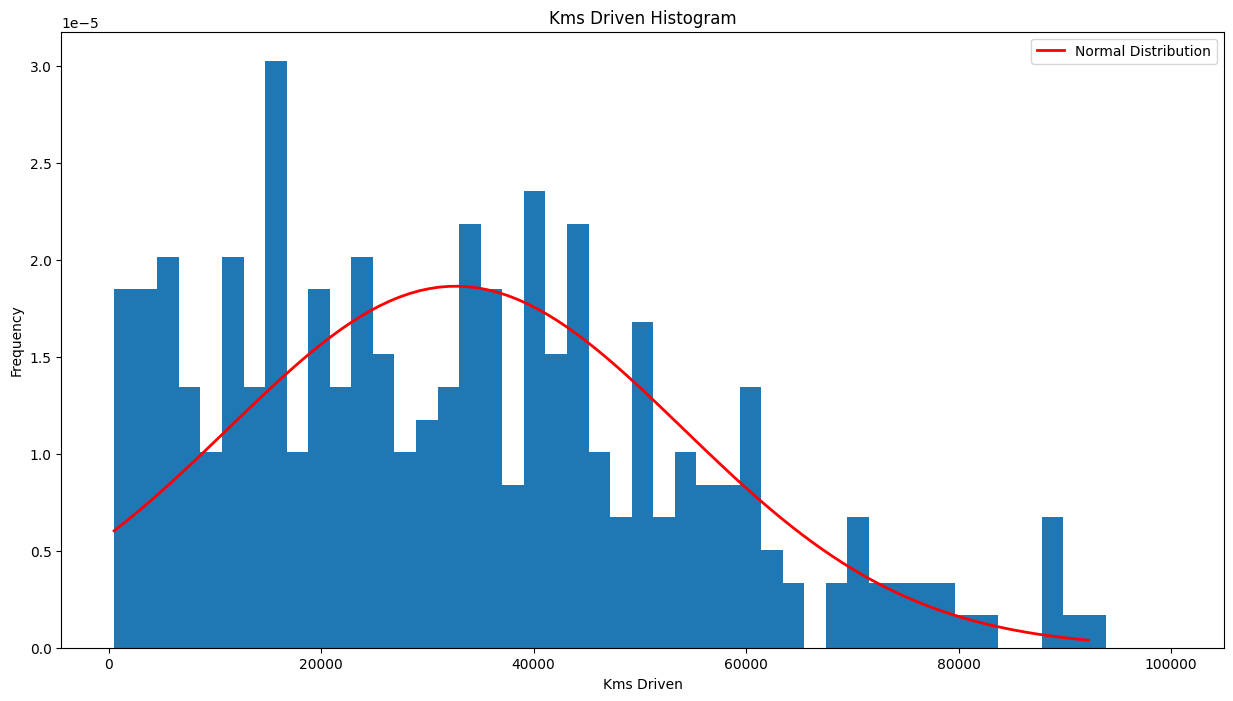

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Calculate the histogram bins
bins = np.linspace(500, 100000, 50)  # 50 bins from 500 to 500000

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the histogram
_, _, patches = ax.hist(NonOutlier['Kms_Driven'], bins=bins, density=True)
plt.xlabel("Kms Driven")
plt.ylabel("Frequency")
plt.title("Kms Driven Histogram")

# Plot the normal distribution
mu, std = norm.fit(NonOutlier['Kms_Driven'])
x = np.linspace(NonOutlier['Kms_Driven'].min(), NonOutlier['Kms_Driven'].max(), 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')
plt.legend()

plt.show()

##Descriptive Stats

In [ ]:
print("Sample Mean = ", NonOutlier['Kms_Driven'].mean())
print("Sample Median = ", NonOutlier['Kms_Driven'].median())
print('The mode is', st.mode(NonOutlier['Kms_Driven']))

#Variance & Standard Deviation
Var_sample = round(np.var(NonOutlier['Kms_Driven'], ddof = 1))
print('Sample variance =', Var_sample, 'km^2.')
Sd_sample = round(np.sqrt(np.var(NonOutlier['Kms_Driven'], ddof = 1)))
print('Sample standard deviation =', Sd_sample, 'km.')

Sample Mean =  32652.1228668942
Sample Median =  31427.0
The mode is 15000.0
Sample variance = 459486580 km^2.
Sample standard deviation = 21436 vkm.


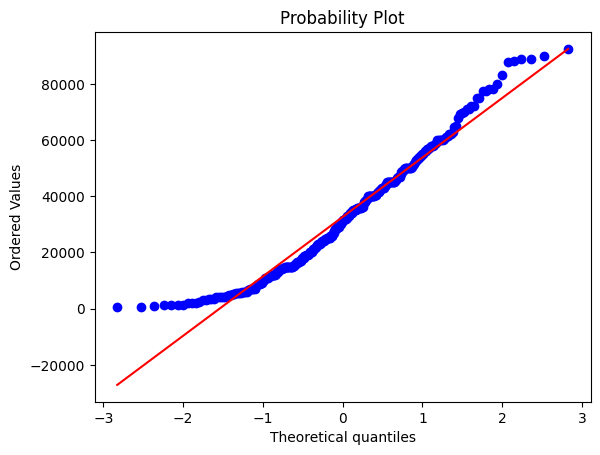

In [ ]:
#Q-Q plot
stats.probplot(NonOutlier['Kms_Driven'], dist="norm", plot=pylab)
pylab.show()

##Shapiro Value

In [ ]:
statistic, p_value = shapiro(NonOutlier['Kms_Driven'])

# Set significance level
alpha = 0.05

# Print the results
print(f'Shapiro-Wilk Test Statistic: {statistic}')
print(f'p-value: {p_value}')

# Check for normality based on the p-value
if p_value > alpha:
    print("(normal)")
else:
    print("(not normal)")

Shapiro-Wilk Test Statistic: 0.9590486884117126
p-value: 2.454190166645276e-07
(not normal)


##BOXCOX DATA

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

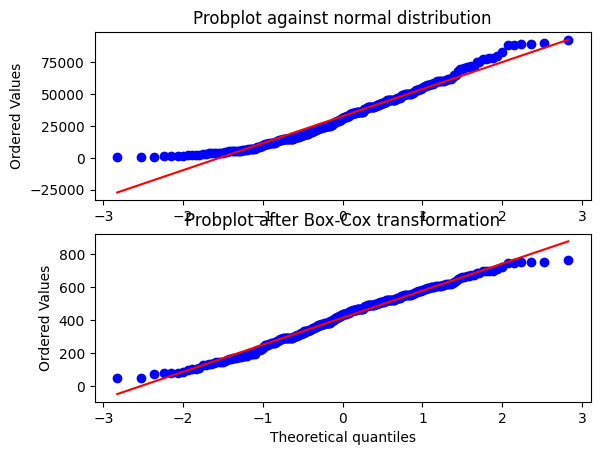

In [ ]:
#create figure
fig = plt.figure()

ax1 = fig.add_subplot(211)
#Create pre-Box Cox qq-plot
prob = stats.probplot(NonOutlier['Kms_Driven'], dist=stats.norm, plot=ax1)

ax1.set_xlabel('')

ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
#BoxCox transformation
BoxCoxData, lambdas = stats.boxcox(NonOutlier['Kms_Driven'])
#Create Box Cox qq-plot
prob = stats.probplot(BoxCoxData, dist=stats.norm, plot=ax2)

ax2.set_title('Probplot after Box-Cox transformation')

After using boxcox technique, we can conclude that the lambda it produces is 0.524, which using the box cox lambda, we can conclude that the right transformation to do is the Square Root Transformation

##Final BoxCox Testing


In [ ]:
statistic, p_value = shapiro(BoxCoxData)
print(f'Shapiro-Wilk Test Statistic: {statistic}')
print(f'p-value: {p_value}')
if p_value > alpha:
    print("(normal)")
else:
    print("(not normal)")

Shapiro-Wilk Test Statistic: 0.9852473735809326
p-value: 0.0041940719820559025
(not normal)


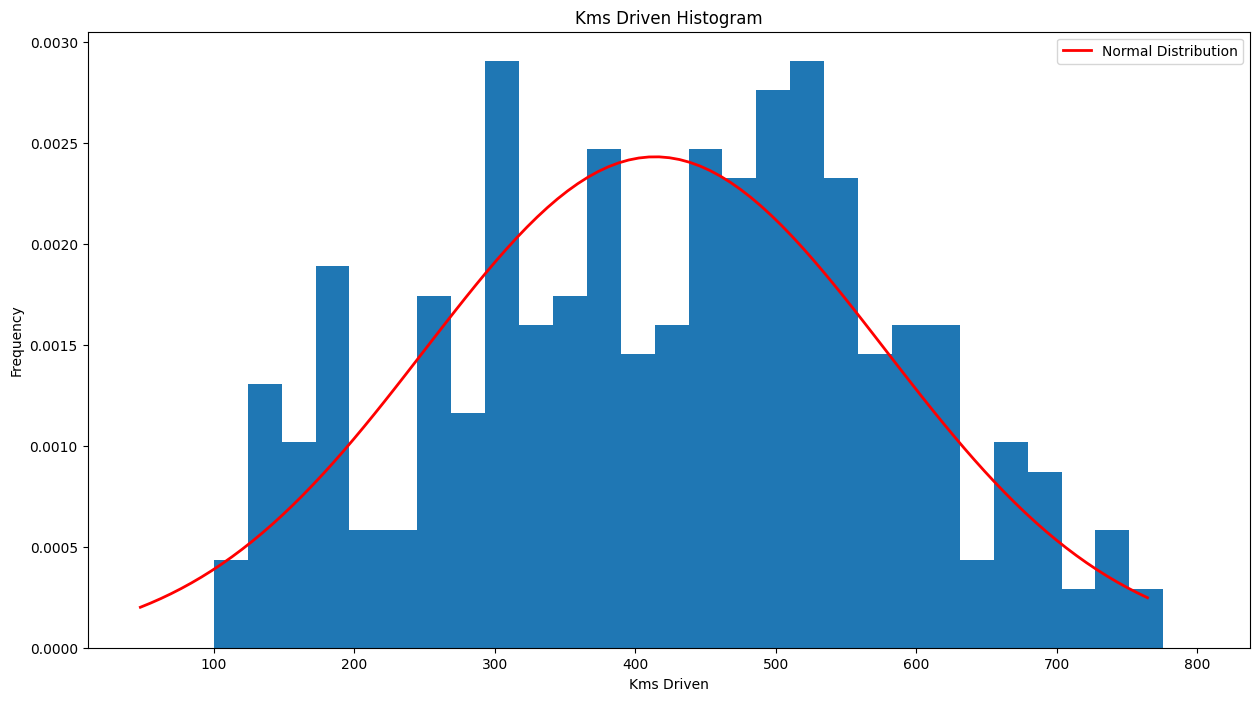

In [ ]:
# Calculate the histogram bins
bins = np.linspace(100, 800, 30)  # 50 bins from 500 to 500000

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the histogram
_, _, patches = ax.hist(pd.DataFrame(BoxCoxData), bins=bins, density=True)
plt.xlabel("Kms Driven")
plt.ylabel("Frequency")
plt.title("Kms Driven Histogram")

# Plot the normal distribution
mu, std = norm.fit(pd.DataFrame(BoxCoxData))
x = np.linspace(pd.DataFrame(BoxCoxData).min(), pd.DataFrame(BoxCoxData).max(), 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')
plt.legend()

plt.show()

In [ ]:
# Define the null hypothesis
H0 = "The average kilometers driven is 40000 km"

# Define the alternative hypothesis
H1 = "The average kilometers driven is different from 40000 km"

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(NonOutlier, 40000)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: [-5.86758352]
p-value: [1.19785723e-08]
Reject the null hypothesis.


##SQUARE ROOT DATA

Shapiro-Wilk Test Statistic: 0.9845893383026123
p-value: 0.003087345277890563
(not normal)


Text(0.5, 1.0, 'Square Root Data')

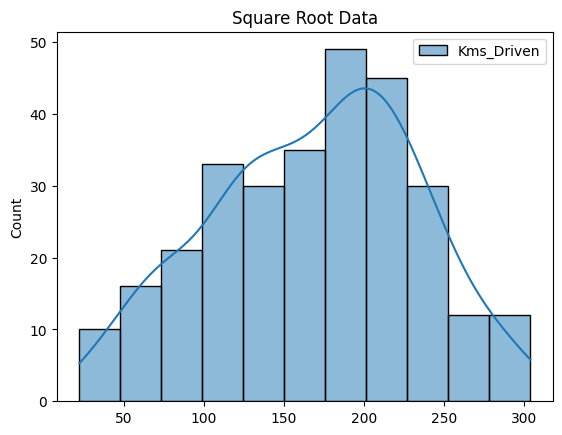

In [ ]:
squareData = np.sqrt(NonOutlier)
statistic, p_value = shapiro(squareData)
print(f'Shapiro-Wilk Test Statistic: {statistic}')
print(f'p-value: {p_value}')
if p_value > alpha:
    print("(normal)")
else:
    print("(not normal)")

#Histogram of the square root data
sns.histplot(squareData, kde=True, color='blue')
plt.title('Square Root Data')

##LOG DATA

In [ ]:
#Log the data set
logNonOutlier = np.log1p(NonOutlier)
#Shapiro Test
statistic, p_value = shapiro(logNonOutlier)
print(f'Shapiro-Wilk Test Statistic: {statistic}')
print(f'p-value: {p_value}')
if p_value > alpha:
    print("(normal)")
else:
    print("(not normal)")

Shapiro-Wilk Test Statistic: 0.896312415599823
p-value: 2.837745500822858e-13
(not normal)


Text(0.5, 1.0, 'Log Data')

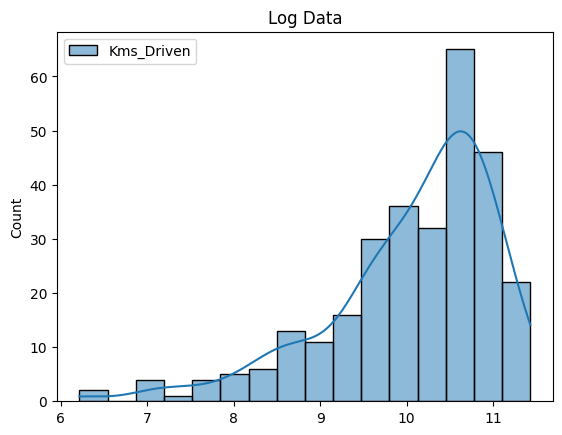

In [ ]:
#Histogram of the log data
sns.histplot(logNonOutlier, kde=True, color='blue')
plt.title('Log Data')

##NonOutlier Confidence Interval + Other Statistics

In [ ]:
# Sample statistics
sample_mean = round(NonOutlier['Kms_Driven'].mean())
sample_std = round(np.sqrt(np.var(NonOutlier['Kms_Driven'], ddof = 1)))
n = len(Data)
confidence_level_1 = 0.90
confidence_level_2 = 0.95
confidence_level_3 = 0.99


# Calculate standard error (population standard deviation unknown)
standard_error = sample_std / np.sqrt(n)

# Degrees of freedom for t-distribution
df = n - 1

# Calculate confidence interval using t.interval()
confidence_interval_1 = t.interval(confidence_level_1, df, loc=sample_mean, scale=standard_error)
confidence_interval_2 = t.interval(confidence_level_2, df, loc=sample_mean, scale=standard_error)
confidence_interval_3 = t.interval(confidence_level_3, df, loc=sample_mean, scale=standard_error)

print(f"Confidence Interval of 90%: {confidence_interval_1}")
print(f"Confidence Interval of 95%: {confidence_interval_2}")
print(f"Confidence Interval of 99%: {confidence_interval_3}")

Confidence Interval of 90%: (30613.40509194727, 34690.59490805273)
Confidence Interval of 95%: (30220.556451684082, 35083.44354831592)
Confidence Interval of 99%: (29449.06216400236, 35854.93783599764)
